In [2]:
from astropy.table import Table, vstack,hstack
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.ndimage as nd
from grizli import utils

In [3]:
params = utils.GTable.read('../mederr_MARC_avgal_newparam.dat',format = 'ascii')
coords = utils.GTable.read('../selected_photometry_catalog.fits')

griz1 = utils.GTable.read('../complete/full_clean_with_mass.fits')
print(len(griz1))
griz2 = utils.GTable.read('../full_clean.fits')
print(len(griz2))
griz = utils.GTable.read('../full_with_phot.fits')
print(len(griz))

ctab = hstack([coords,params])

20112
29047
292707


In [5]:
# Match cats with photcat

idx, dr = griz1.match_to_catalog_sky(ctab)

new_idx = idx[dr.value<0.6]
grizm1 = griz1[new_idx]
ctabm1 = ctab[dr.value<0.6]

idx, dr = griz2.match_to_catalog_sky(ctab)

new_idx = idx[dr.value<0.6]
grizm2 = griz2[new_idx]
ctabm2 = ctab[dr.value<0.6]

idx, dr = griz.match_to_catalog_sky(ctab)

new_idx = idx[dr.value<0.6]
grizm = griz[new_idx]
ctabm = ctab[dr.value<0.6]

grizm2.write('../get_mass_for_comparison2.fits',overwrite=True)

In [4]:
wmass2 = utils.GTable.read('../got_mass_z_1.3_2.3_753.fits')

idx, dr = wmass2.match_to_catalog_sky(ctab)
new_idx = idx[dr.value<0.6]
wmass2_match = wmass2[new_idx]
ctab_match = ctab[dr.value<0.6]


In [158]:
len(dr[dr.value<0.6].value)

176

16

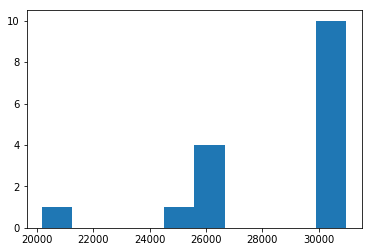

In [176]:
wmass2 = utils.GTable.read('../got_mass_z_1.3_2.3.fits')
griz2 = hstack([grizm2,wmass2])

(dr.value<0.4).sum()
plt.hist(dr[dr.value>1000].value)
len(ctab[(dr.value>100)&(ctab['par'] == 307)])
np.unique(ctab[(dr.value>5)]['par'])
np.unique(ctab['par'][dr.value>1000])
len(dr[dr.value>1000].value)

(array([ 35., 111.,  72.,  64.,  10.,   5.,   4.,   0.,   2.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

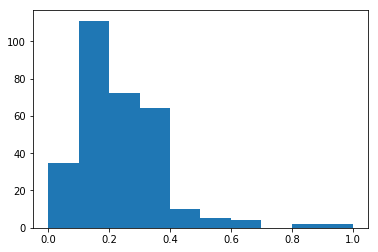

In [108]:
plt.hist(dr.value,range=[0,1])

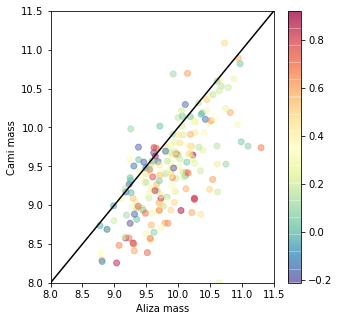

In [10]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
#ax.scatter(griz2['mass'],ctabm['logM_50'],c='gray',alpha=0.5)
#ax.errorbar(wmass2_match['mass'],ctab_match['logM_50'],yerr=ctab_match['logM_50']-ctab_match['logM_16'],linestyle='',color='blue',alpha=0.5)
sc = ax.scatter(wmass2_match['mass'],ctab_match['logM_50'],alpha=0.5,cmap = plt.cm.Spectral_r,c = wmass2_match['color'])
cb = plt.colorbar(sc)

ax.set_ylim([8,11.5])
ax.set_xlim([8,11.5])
ax.set_xlabel('Aliza mass')
ax.set_ylabel('Cami mass')
ax.plot([8,11.5],[8,11.5],c='k')
fig.savefig('../figures/compare_mass_hmag_only.png',dpi=400)

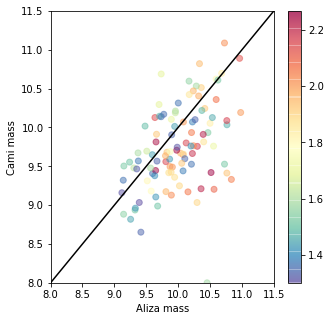

In [20]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
#ax.scatter(griz2['mass'],ctabm['logM_50'],c='gray',alpha=0.5)
#ax.errorbar(wmass2_match['mass'],ctab_match['logM_50'],yerr=ctab_match['logM_50']-ctab_match['logM_16'],linestyle='',color='blue',alpha=0.5)
sc = ax.scatter(wmass2_match['mass'][mag_clip],ctab_match['logM_50'][mag_clip],alpha=0.5,cmap = plt.cm.Spectral_r,c = wmass2_match['redshift'][mag_clip])
cb = plt.colorbar(sc)

ax.set_ylim([8,11.5])
ax.set_xlim([8,11.5])
ax.set_xlabel('Aliza mass')
ax.set_ylabel('Cami mass')
ax.plot([8,11.5],[8,11.5],c='k')
fig.savefig('../figures/compare_mass.png',dpi=400)

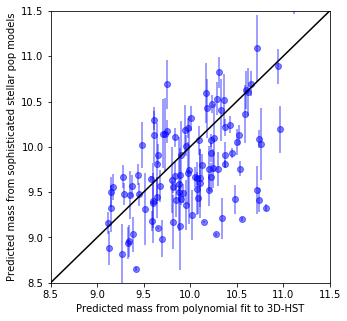

In [17]:
fig = plt.figure(figsize=[5,5])
ax = fig.add_subplot(111)
# ax.scatter(griz2['mass'],ctabm['logM_50'],c='gray',alpha=0.5)
# ax.errorbar(wmass2_match['mass'],ctab_match['logM_50'],yerr=ctab_match['logM_50']-ctab_match['logM_16'],linestyle='',color='blue',alpha=0.5)
ax.scatter(wmass2_match['mass'][mag_clip],ctab_match['logM_50'][mag_clip],alpha=0.5,color='blue')
ax.errorbar(wmass2_match['mass'][mag_clip],ctab_match['logM_50'][mag_clip],yerr=ctab_match['logM_50'][mag_clip]-ctab_match['logM_16'][mag_clip],linestyle='',color='blue',alpha=0.5)


ax.set_ylim([8.5,11.5])
ax.set_xlim([8.5,11.5])
ax.set_xlabel('Predicted mass from polynomial fit to 3D-HST')
ax.set_ylabel('Predicted mass from sophisticated stellar pop models')
ax.plot([8,11.5],[8,11.5],c='k')
fig.savefig('../figures/compare_mass_ppt.png',dpi=400)

In [11]:
mag_clip = (wmass2_match['mag_wfc3,ir,f160w']<24)&(wmass2_match['mag_wfc3,ir,f125w']<24)&(wmass2_match['hmag_aliza']<24)



(array([ 3.,  2.,  6., 20., 21., 37., 47., 42., 12.,  3.]),
 array([20.1366406 , 20.67211332, 21.20758603, 21.74305874, 22.27853146,
        22.81400417, 23.34947688, 23.8849496 , 24.42042231, 24.95589503,
        25.49136774]),
 <a list of 10 Patch objects>)

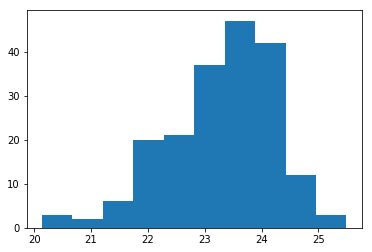

In [18]:
plt.hist((wmass2_match['hmag_aliza']))